In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Extraction from html files

In [ ]:
#Load the data folder with labels
import pandas as pd
import os

df = pd.DataFrame()

source_path = "/content/drive/MyDrive/data/data"

for i in sorted(os.listdir(source_path)):
  print(i)


.DS_Store
Balance Sheets
Cash Flow
Income Statement
Notes
Others


In [ ]:
#Dictionary storing the folders and data links
mapping = {}
source_path = "/content/drive/MyDrive/data/data/"

for i in sorted(os.listdir(source_path)):
    # checking if it is directory or not
    if os.path.isdir(source_path+i):
        # creating the dictionary with class as key
        mapping[i] = sorted(os.listdir(source_path+i))

In [ ]:
mapping.keys()

dict_keys(['Balance Sheets', 'Cash Flow', 'Income Statement', 'Notes', 'Others'])

In [ ]:
# label or class or target list
label = []
# links for html
html_links = []

# iterating through dictionary
for i, j in mapping.items():
    # iterating through list of files for each class
    for k in j:
        file_path = source_path + i + "/" + k
        try:
            # reading the file
            with open(file_path, 'r') as file:
                # appending labels/class/target
                label.append(i)
                # appending html links
                html_links.append(file_path)
        except (UnicodeDecodeError, FileNotFoundError, IOError) as e:
            print(f"Skipping file {file_path} due to error: {e}")

In [ ]:
# creating column in dataframe and assigning data
df["label"] = label
df["html_link"] = html_links

In [ ]:
!pip install weasyprint

In [ ]:
#convert html files to pdfs
import pandas as pd
from weasyprint import HTML


# Function to convert HTML to PDF
def convert_html_to_pdf(html_link):
    # Set output file name
    pdf_filename = html_link.split('/')[-1].replace('.html', '.pdf')
    # Load HTML file
    html = HTML(html_link)
    # Convert HTML to PDF
    pdf_path = pdf_filename
    html.write_pdf(pdf_path)
    return pdf_path

# Apply the conversion function to each HTML link in the DataFrame
df['pdf_link'] = df['html_link'].apply(convert_html_to_pdf)


In [ ]:
df

,label,html_link,pdf_link
0,Balance Sheets,/content/drive/MyDrive/data/data/Balance Sheet...,.DS_Store
1,Balance Sheets,/content/drive/MyDrive/data/data/Balance Sheet...,18320959_3.pdf
2,Balance Sheets,/content/drive/MyDrive/data/data/Balance Sheet...,18391125_2.pdf
3,Balance Sheets,/content/drive/MyDrive/data/data/Balance Sheet...,18442877_5.pdf
4,Balance Sheets,/content/drive/MyDrive/data/data/Balance Sheet...,18445487_2.pdf
...,...,...,...
2524,Others,/content/drive/MyDrive/data/data/Others/189648...,18964858_6.pdf
2525,Others,/content/drive/MyDrive/data/data/Others/189648...,18964858_7.pdf
2526,Others,/content/drive/MyDrive/data/data/Others/189648...,18964858_8.pdf
2527,Others,/content/drive/MyDrive/data/data/Others/192135...,19213523_4.pdf


In [ ]:
!pip install PyMuPDF

In [ ]:
#extracting text form PDf as saving to new col in datafram
import pandas as pd
import fitz  # PyMuPDF

def extract_text_from_pdf(pdf_link):
    try:
        # Open the PDF file
        document = fitz.open(pdf_link)
        text = ""
        # Iterate through each page and extract text
        for page_num in range(len(document)):
            page = document.load_page(page_num)
            text += page.get_text()
        return text
    except Exception as e:
        print(f"Error extracting text from {pdf_link}: {e}")
        return None

# Apply the extraction function to each PDF link in the DataFrame
df['pdf_text'] = df['pdf_link'].apply(extract_text_from_pdf)

# Print the DataFrame to verify the new column has been added
print(df.head())


            label                                          html_link  \
0  Balance Sheets  /content/drive/MyDrive/data/data/Balance Sheet...   
1  Balance Sheets  /content/drive/MyDrive/data/data/Balance Sheet...   
2  Balance Sheets  /content/drive/MyDrive/data/data/Balance Sheet...   
3  Balance Sheets  /content/drive/MyDrive/data/data/Balance Sheet...   
4  Balance Sheets  /content/drive/MyDrive/data/data/Balance Sheet...   

         pdf_link                                           pdf_text  
0       .DS_Store  Bud1 H\nH \n@\n \nИ\n460658\n  ...  
1  18320959_3.pdf  (7 in lacs)\n(7 in lacs)\n_1_\nStandalone\nCon...  
2  18391125_2.pdf  Consolidated\nStandalone\nParticulars\nAs at\n...  
3  18442877_5.pdf  Standalone\nConsolidated\nAudited\nAudited\nPa...  
4  18445487_2.pdf  GUJARAT NARMADA VALLEY FERTILIZERS & CHEMICALS...  


In [ ]:
df.iloc[1]['pdf_text']

'(7 in lacs)\n(7 in lacs)\n_1_\nStandalone\nConsolidated\nSr.\nNo.\nParticulars\nAs at\n31st\nMarch\n2018\nAs at\n31st\nMarch\n2017\nAs at\n31st\nMarch\n2018\nAs at\n31st\nMarch\n2017\nA Assets\n1) Non-Current Assets\n(a) Property, Plant\nand Equipment\n10,723.96 9,281.23\n10,723.96 9,281.23\n(b) Capital work in\nprogress\n607.46\n-\n607.46\n-\n(c) Intangible assets\n17.44\n18.71\n17.44\n18.71\n(d) Financial assets\n(i) Non-current\ninvestments\n150.00\n150.00\n63.42\n24.69\n(ii) Loans\n-\n-\n-\n-\n(iii) Other financial\nassets\n197.66\n130.62\n197.66\n130.62\n(e) Other non-current\nassets\n-\n-\n-\n-\nTotal Non-Current\nAssets (A)\n11,696.52 9,580.56\n11,609.94 9,455.25\n2) Current Assets\n(a) Inventories\n8,002.02\n13,925.10 8,002.02\n13,925.10\n(b) Financial assets\n(i) Trade Receivables\n18,541.75 13,671.01 18,541.75 13,671.01\n(ii) Cash and cash\nequivalents\n2,883.82\n177.11\n2,883.82\n177.11\n(iii) Bank balances\nother than (ii) above\n357.08\n1,538.45\n357.08\n1,538.45\n(ivj Lo

In [ ]:
df.shape

(2529, 4)

In [ ]:
#extracting text from html_links
import pandas as pd
from bs4 import BeautifulSoup

# Function to extract text from HTML
def extract_text_from_html(html_link):
    try:
        # Open the HTML file and read its content
        with open(html_link, 'r', encoding='utf-8') as file:
            content = file.read()
        # Parse the HTML content
        soup = BeautifulSoup(content, 'lxml')
        # Extract text from the HTML
        text = soup.get_text(separator=' ', strip=True)
        return text
    except Exception as e:
        print(f"Error extracting text from {html_link}: {e}")
        return None

# Apply the extraction function to each HTML link in the DataFrame
df['html_text'] = df['html_link'].apply(extract_text_from_html)

# Print the DataFrame to verify the new column has been added
print(df.head())


Error extracting text from /content/drive/MyDrive/data/data/Balance Sheets/.DS_Store: 'utf-8' codec can't decode byte 0xff in position 582: invalid start byte
Error extracting text from /content/drive/MyDrive/data/data/Income Statement/.DS_Store: 'utf-8' codec can't decode byte 0x98 in position 581: invalid start byte
Error extracting text from /content/drive/MyDrive/data/data/Notes/.DS_Store: 'utf-8' codec can't decode byte 0xe0 in position 10: invalid continuation byte
Error extracting text from /content/drive/MyDrive/data/data/Others/.DS_Store: 'utf-8' codec can't decode byte 0xa0 in position 22: invalid start byte
            label                                          html_link  \
0  Balance Sheets  /content/drive/MyDrive/data/data/Balance Sheet...   
1  Balance Sheets  /content/drive/MyDrive/data/data/Balance Sheet...   
2  Balance Sheets  /content/drive/MyDrive/data/data/Balance Sheet...   
3  Balance Sheets  /content/drive/MyDrive/data/data/Balance Sheet...   
4  Balance She

In [ ]:
df.to_csv('/content/sample_data/data.csv', index=False)


#Data Extraction done now we will start with data preprocessing and model building

In [11]:
#import the dataset
import pandas as pd
dataset = pd.read_csv('/content/data (1).csv')

In [12]:
dataset = dataset.dropna(subset=['html_text'])

In [13]:
Newdataset = dataset

In [14]:
# make a new dataframe for each class and its data containing the most occurring word in them
# Create a new DataFrame with rows where the 'label' is 'Balance Sheets'
dfBalanceSheets = Newdataset[Newdataset['label'] == 'Balance Sheets'][['pdf_text']]
dfBalanceSheets['label'] = 'Balance Sheets'

In [ ]:
dfBalanceSheets

In [16]:
import io
from io import StringIO
import os
import glob
import sys
import string
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!python -m nltk.downloader stopwords
!python -m nltk.downloader wordnet

In [18]:
'''Data cleaning: 1.removing special char 2. removing roman values
 3. removing specified char 4.removing numeric values 5.removing standalone alphbets and numerics 6.converting words to their dictionary form '''
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Function to remove specific patterns
def remove_patterns(text):
    # Defining patterns to remove
    patterns_to_remove = [r'\b\d+(?:st|nd|rd|th)\b', r'\bbj\b', r'\bivj\b']

    # Replace patterns with empty string
    for pattern in patterns_to_remove:
        text = re.sub(pattern, '', text)
    return text

def remove_roman(text):
    # Define pattern for Roman numerals (case-insensitive)
    roman_pattern = r'\b(?:i{1,3}|iv|v|vi{0,3}|ix|x{1,3}|xl|l|lx{0,3}|xc|c{1,3}|cd|d|dc{0,3}|cm|m{1,3})\b'
    # Replace Roman numerals with empty string
    return re.sub(roman_pattern, '', text, flags=re.IGNORECASE)

# Pre-processing the extracted textual data
stop = stopwords.words('english')
stemmer = WordNetLemmatizer()

for index, row in dfBalanceSheets.iterrows():
    text = row['pdf_text']
    # Lower case conversion
    text = " ".join(text.lower() for text in text.split())
    # Getting rid of special characters
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Removing specific patterns
    text = remove_patterns(text)
    # Removing standalone numeric values
    text = re.sub(r'\b\d+\b', '', text)
    # Removing Roman numerals
    text = remove_roman(text)
    # Removing stop words
    text = " ".join(word for word in text.split() if word not in stop)
    # Removing single letters
    text = " ".join(word for word in text.split() if len(word) > 1)
    # Converting words to their dictionary form
    text = " ".join(stemmer.lemmatize(word) for word in text.split())
    # Update the 'pdf_text' column with preprocessed text
    dfBalanceSheets.at[index, 'pdf_text'] = text


In [19]:
dfBalanceSheets.iloc[1]['pdf_text']

'consolidated standalone particular mar18 mar17 mar18 mar17 asset noncurrent asset property plant equipment capital workinprogress goodwill intangible asset intangible asset development financial asset investment loan financial asset deferred tax asset net income tax asset net noncurrent asset total noncurrent asset current asset inventory financial asset investment trade receivables cash cash equivalent bank balance loan financial asset current asset total current asset total asset equity liability equity equity share capital equity equity attributable shareholder company noncontrolling interest total equity noncurrent liability financial liability borrowing financial liability provision deferred tax liability net income tax liability net noncurrent liability total noncurrent liability current liability financial liability borrowing trade payable financial liability income tax liability net provision current liability total current liability total liability total equity liability'

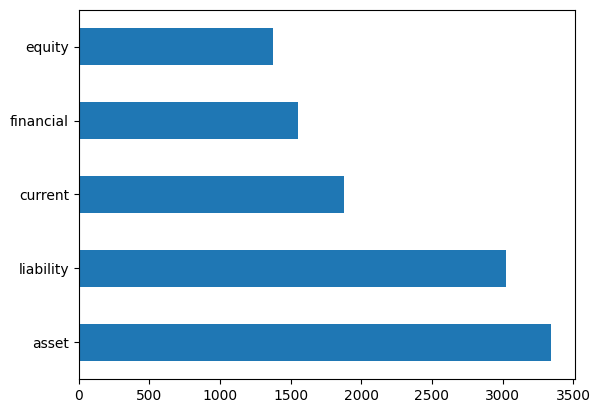

In [20]:
# Plotting 5 most occuring words in the 'BalanceSheets' documents

BalanceSheetsfreq = pd.Series(' '.join(dfBalanceSheets['pdf_text']).split()).value_counts()[:5]
BalanceSheetsfreq.plot(kind='barh');
plt.show()

In [21]:
#Adding these top 5 words as an additional features to the dataframe which will be useful for classification algorithms
dfBalanceSheets['Identifiers'] = 'equity,financial,current,liability,asset'
dfBalanceSheets[:5]

,pdf_text,label,Identifiers
1,lac lac standalone consolidated sr particular ...,Balance Sheets,"equity,financial,current,liability,asset"
2,consolidated standalone particular mar18 mar17...,Balance Sheets,"equity,financial,current,liability,asset"
3,standalone consolidated audited audited partic...,Balance Sheets,"equity,financial,current,liability,asset"
4,gujarat narmada valley fertilizer chemical lim...,Balance Sheets,"equity,financial,current,liability,asset"
5,standalone consolidated particular equity liab...,Balance Sheets,"equity,financial,current,liability,asset"


##Performing Same task on other categories

In [22]:
dfCashFlows = Newdataset[Newdataset['label'] == 'Cash Flow'][['pdf_text']]
dfCashFlows['label'] = 'Cash Flow'

import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Function to remove specific patterns
def remove_patterns(text):
    # Defining patterns to remove
    patterns_to_remove = [r'\b\d+(?:st|nd|rd|th)\b', r'\bbj\b', r'\bivj\b']

    # Replace patterns with empty string
    for pattern in patterns_to_remove:
        text = re.sub(pattern, '', text)
    return text

def remove_roman(text):
    # Define pattern for Roman numerals (case-insensitive)
    roman_pattern = r'\b(?:i{1,3}|iv|v|vi{0,3}|ix|x{1,3}|xl|l|lx{0,3}|xc|c{1,3}|cd|d|dc{0,3}|cm|m{1,3})\b'
    # Replace Roman numerals with empty string
    return re.sub(roman_pattern, '', text, flags=re.IGNORECASE)

# Pre-processing the extracted textual data
stop = stopwords.words('english')
stemmer = WordNetLemmatizer()

for index, row in dfCashFlows.iterrows():
    text = row['pdf_text']
    # Lower case conversion
    text = " ".join(text.lower() for text in text.split())
    # Getting rid of special characters
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Removing specific patterns
    text = remove_patterns(text)
    # Removing standalone numeric values
    text = re.sub(r'\b\d+\b', '', text)
    # Removing Roman numerals
    text = remove_roman(text)
    # Removing stop words
    text = " ".join(word for word in text.split() if word not in stop)
    # Removing single letters
    text = " ".join(word for word in text.split() if len(word) > 1)
    # Converting words to their dictionary form
    text = " ".join(stemmer.lemmatize(word) for word in text.split())
    # Update the 'pdf_text' column with preprocessed text
    dfCashFlows.at[index, 'pdf_text'] = text


In [23]:
dataset[dataset['label']=='Cash Flow']['pdf_text'].iloc[1]

'Cash flows from operating activities\nNet income\n$839,534\n$1,262,453\n$1,360,471\nAdjustments to reconcile net income to net cash provided by\noperating activities\nDepreciation and amortization\n67,155\n124,638\n225,153\nDeferred income taxes\n(34,528)\n5,199\n(10,518)\n(Gain) loss on sale of\nproperty and equipment\n(21,985)\n880\n(228)\nStock based compensation\nexpense, net\n949\n-\n-\nExcess tax benefit related to\nstock options exercise\n(6,859)\n(3,584)\n(1,002)\nGain on sale of investment\nsecurities\n(3,722)\n(5,861)\n(23,884)\nEquity in earnings of\naffiliates\n(920)\n(436)\n(2,288)\nProvision for doubtful\naccounts, net\n13,751\n1,354\n12,345\nOthers, net\n771\n19,394\n15,664\nChanges in assets and liabilities, net of effects of\nacquisitions\nAccounts receivable and\nunbilled revenue\n(166,446)\n(33,204)\n(179,117)\nOther assets\n(82,219)\n8,886\n19,247\nAccounts payable\n(1,495)\n9,250\n36,707\nAccrued employee costs\n(7,333)\n55,726\n9,107\nOther liabilities\n35,854\n(

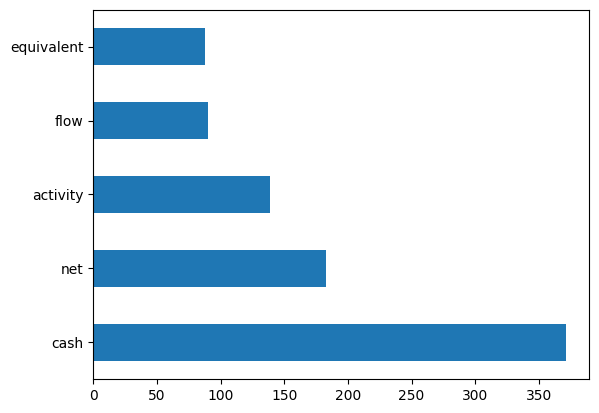

In [24]:
# Plotting 5 most occuring words in the 'Cash Flow' documents

CashFlowfreq = pd.Series(' '.join(dfCashFlows['pdf_text']).split()).value_counts()[:5]
CashFlowfreq.plot(kind='barh');
plt.show()

In [25]:
dfCashFlows['Identifiers'] = 'equivalent,flow,activity,net,cash'
dfCashFlows[:5]

,pdf_text,label,Identifiers
271,particular quarter ended year ended mar18 mar1...,Cash Flow,"equivalent,flow,activity,net,cash"
272,cash flow operating activity net income adjust...,Cash Flow,"equivalent,flow,activity,net,cash"
273,cash flow financing activity decrease increase...,Cash Flow,"equivalent,flow,activity,net,cash"
274,deposit bank maturity le three march march mon...,Cash Flow,"equivalent,flow,activity,net,cash"
275,particular year ended december fo year decem c...,Cash Flow,"equivalent,flow,activity,net,cash"


In [26]:
dfCashFlows.iloc[2]['pdf_text']

'cash flow financing activity decrease increase principal capital lease obligation net proceeds short term borrowing repayment short term borrowing proceeds long term debt repayment long term debt buyback equity share including transaction cost payment deferred consideration business acquisition proceeds issuance equity share proceeds subscription share pending allotment dividend paid excess tax benefit related stock option exercise net cash used financing activity effect exchange rate change cash cash equivalent net increase decrease cash cash equivalent cash cash equivalent beginning year cash cash equivalent end year supplemental disclosure cash flow share issued consideration cash acquisition business geometric limited property equipment acquired capital lease obligation cash payment interest expense cash payment income tax'

In [27]:
dfIncomeStatement = Newdataset[Newdataset['label'] == 'Income Statement'][['pdf_text']]
dfIncomeStatement['label'] = 'Income Statment'

import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Function to remove specific patterns
def remove_patterns(text):
    # Defining patterns to remove
    patterns_to_remove = [r'\b\d+(?:st|nd|rd|th)\b', r'\bbj\b', r'\bivj\b']

    # Replace patterns with empty string
    for pattern in patterns_to_remove:
        text = re.sub(pattern, '', text)
    return text

def remove_roman(text):
    # Define pattern for Roman numerals (case-insensitive)
    roman_pattern = r'\b(?:i{1,3}|iv|v|vi{0,3}|ix|x{1,3}|xl|l|lx{0,3}|xc|c{1,3}|cd|d|dc{0,3}|cm|m{1,3})\b'
    # Replace Roman numerals with empty string
    return re.sub(roman_pattern, '', text, flags=re.IGNORECASE)

# Pre-processing the extracted textual data
stop = stopwords.words('english')
stemmer = WordNetLemmatizer()

for index, row in dfIncomeStatement.iterrows():
    text = row['pdf_text']
    # Lower case conversion
    text = " ".join(text.lower() for text in text.split())
    # Getting rid of special characters
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Removing specific patterns
    text = remove_patterns(text)
    # Removing standalone numeric values
    text = re.sub(r'\b\d+\b', '', text)
    # Removing Roman numerals
    text = remove_roman(text)
    # Removing stop words
    text = " ".join(word for word in text.split() if word not in stop)
    # Removing single letters
    text = " ".join(word for word in text.split() if len(word) > 1)
    # Converting words to their dictionary form
    text = " ".join(stemmer.lemmatize(word) for word in text.split())
    # Update the 'pdf_text' column with preprocessed text
    dfIncomeStatement.at[index, 'pdf_text'] = text


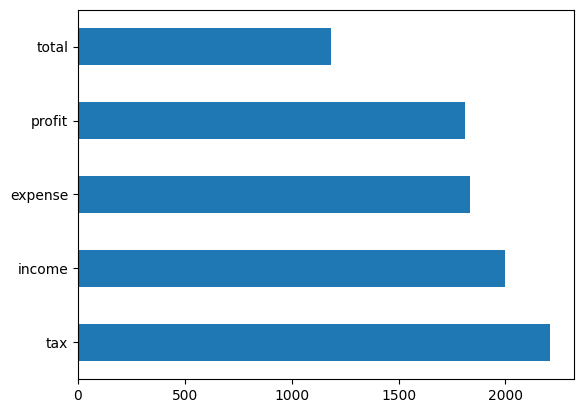

In [28]:
# Plotting 5 most occuring words in the 'BalanceSheets' documents
IncomeStatementfreq = pd.Series(' '.join(dfIncomeStatement['pdf_text']).split()).value_counts()[:5]
IncomeStatementfreq.plot(kind='barh');
plt.show()

In [29]:
dataset['label'].unique()

array(['Balance Sheets', 'Cash Flow', 'Income Statement', 'Notes',
       'Others'], dtype=object)

In [30]:
dfIncomeStatement['Identifiers'] = 'total,profit,expense,income,tax'
dfIncomeStatement[:5]

,pdf_text,label,Identifiers
308,corresponding year date year date preceding mo...,Income Statment,"total,profit,expense,income,tax"
309,particular quarter ended year ended year ende ...,Income Statment,"total,profit,expense,income,tax"
310,consolidated particular year ended year ended ...,Income Statment,"total,profit,expense,income,tax"
311,standalone quarter ended year ended sr particu...,Income Statment,"total,profit,expense,income,tax"
312,sr consolidated particular quarter ended year ...,Income Statment,"total,profit,expense,income,tax"


In [31]:
dfNotes = Newdataset[Newdataset['label'] == 'Notes'][['pdf_text']]
dfNotes['label'] = 'Notes'

import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Function to remove specific patterns
def remove_patterns(text):
    # Defining patterns to remove
    patterns_to_remove = [r'\b\d+(?:st|nd|rd|th)\b', r'\bbj\b', r'\bivj\b']

    # Replace patterns with empty string
    for pattern in patterns_to_remove:
        text = re.sub(pattern, '', text)
    return text

def remove_roman(text):
    # Define pattern for Roman numerals (case-insensitive)
    roman_pattern = r'\b(?:i{1,3}|iv|v|vi{0,3}|ix|x{1,3}|xl|l|lx{0,3}|xc|c{1,3}|cd|d|dc{0,3}|cm|m{1,3})\b'
    # Replace Roman numerals with empty string
    return re.sub(roman_pattern, '', text, flags=re.IGNORECASE)

# Pre-processing the extracted textual data
stop = stopwords.words('english')
stemmer = WordNetLemmatizer()

for index, row in dfNotes.iterrows():
    text = row['pdf_text']
    # Lower case conversion
    text = " ".join(text.lower() for text in text.split())
    # Getting rid of special characters
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Removing specific patterns
    text = remove_patterns(text)
    # Removing standalone numeric values
    text = re.sub(r'\b\d+\b', '', text)
    # Removing Roman numerals
    text = remove_roman(text)
    # Removing stop words
    text = " ".join(word for word in text.split() if word not in stop)
    # Removing single letters
    text = " ".join(word for word in text.split() if len(word) > 1)
    # Converting words to their dictionary form
    text = " ".join(stemmer.lemmatize(word) for word in text.split())
    # Update the 'pdf_text' column with preprocessed text
    dfNotes.at[index, 'pdf_text'] = text


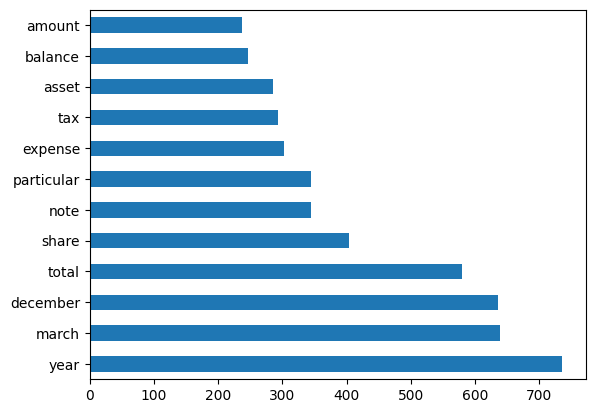

In [32]:
# Plotting 5 most occuring words in the 'BalanceSheets' documents
Notesfreq = pd.Series(' '.join(dfNotes['pdf_text']).split()).value_counts()[:12]
Notesfreq.plot(kind='barh');
plt.show()

In [33]:
dfNotes['pdf_text'].iloc[1]

'hexaware technology limited parent wholly owned subsidiary hexaware technology inc usa hexaware technology mexico de rl de cv mexico hexaware technology ukltc uk hexaware technology asia pacific pte limitec singapore hexaware technology gmbh germany hexaware technology canada limitec canada dexaware technology brazil ltd brazi subsidiary hexaware technology uk ltd brazi guangzhou hexaware information technology company limitec china hexaware technology llc russia 1c hexaware technology saudi llc saudi arabia hexaware technology romania srl formec september subsidiary hexaware technology uk ltd romania associate fxperis technology solution pte ltd ownership interest hexaware technology asia pacific pte limited wef december singapore total'

In [34]:
dfNotes['Identifiers'] = 'year,share,note,particular,amount,total'
dfNotes[:5]

,pdf_text,label,Identifiers
614,name entity country incorporation net asset ye...,Notes,"year,share,note,particular,amount,total"
615,hexaware technology limited parent wholly owne...,Notes,"year,share,note,particular,amount,total"
616,particular freehold land building plant machin...,Notes,"year,share,note,particular,amount,total"
617,january translation exchange rate difference d...,Notes,"year,share,note,particular,amount,total"
618,intangible asset intangible asset consist foll...,Notes,"year,share,note,particular,amount,total"


In [35]:
dfOthers = Newdataset[Newdataset['label'] == 'Others'][['pdf_text']]
dfOthers['label'] = 'Others'

In [37]:

import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Function to remove specific patterns
def remove_patterns(text):
    # Defining patterns to remove
    patterns_to_remove = [r'\b\d+(?:st|nd|rd|th)\b', r'\bbj\b', r'\bivj\b']

    # Replace patterns with empty string
    for pattern in patterns_to_remove:
        text = re.sub(pattern, '', text)
    return text

def remove_roman(text):
    # Define pattern for Roman numerals (case-insensitive)
    roman_pattern = r'\b(?:i{1,3}|iv|v|vi{0,3}|ix|x{1,3}|xl|l|lx{0,3}|xc|c{1,3}|cd|d|dc{0,3}|cm|m{1,3})\b'
    # Replace Roman numerals with empty string
    return re.sub(roman_pattern, '', text, flags=re.IGNORECASE)

# Pre-processing the extracted textual data
stop = stopwords.words('english')
stemmer = WordNetLemmatizer()

for index, row in dfOthers.iterrows():
    text = row['pdf_text']
    # Lower case conversion
    text = " ".join(text.lower() for text in text.split())
    # Getting rid of special characters
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Removing specific patterns
    text = remove_patterns(text)
    # Removing standalone numeric values
    text = re.sub(r'\b\d+\b', '', text)
    # Removing Roman numerals
    text = remove_roman(text)
    # Removing stop words
    text = " ".join(word for word in text.split() if word not in stop)
    # Removing single letters
    text = " ".join(word for word in text.split() if len(word) > 1)
    # Converting words to their dictionary form
    text = " ".join(stemmer.lemmatize(word) for word in text.split())
    # Update the 'pdf_text' column with preprocessed text
    dfOthers.at[index, 'pdf_text'] = text


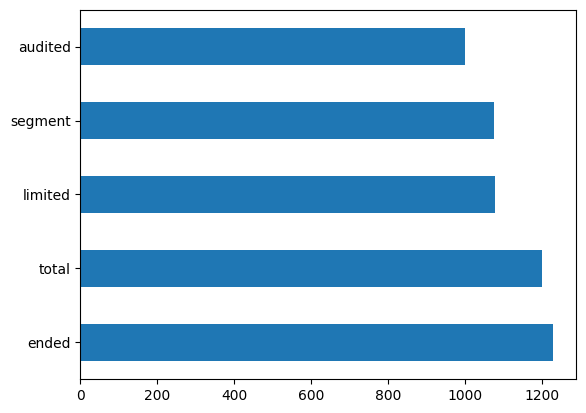

In [38]:
# Plotting 5 most occuring words in the 'BalanceSheets' documents
Othersfreq = pd.Series(' '.join(dfOthers['pdf_text']).split()).value_counts()[:5]
Othersfreq.plot(kind='barh')
plt.show()

In [39]:
dfOthers['Identifiers'] = 'ended,total,limited,segment,audited'
dfOthers[:5]

,pdf_text,label,Identifiers
1305,remeasurement cost net defined benefit liabili...,Others,"ended,total,limited,segment,audited"
1306,particular consolidated standalone month ended...,Others,"ended,total,limited,segment,audited"
1307,particular consolidated standalone forex gain ...,Others,"ended,total,limited,segment,audited"
1308,quarter jan mar quarter janmar sato volume cam...,Others,"ended,total,limited,segment,audited"
1309,name company country incorporation nature rela...,Others,"ended,total,limited,segment,audited"


#Merging all the data with the labels for further processing

In [40]:
frames = [dfBalanceSheets, dfCashFlows, dfIncomeStatement, dfNotes, dfOthers]
finalframe = pd.concat(frames,sort=False)
finalframe = finalframe[['label','pdf_text','Identifiers']]
finalframe = finalframe.reset_index(drop=True)
finalframe[:5]


,label,pdf_text,Identifiers
0,Balance Sheets,lac lac standalone consolidated sr particular ...,"equity,financial,current,liability,asset"
1,Balance Sheets,consolidated standalone particular mar18 mar17...,"equity,financial,current,liability,asset"
2,Balance Sheets,standalone consolidated audited audited partic...,"equity,financial,current,liability,asset"
3,Balance Sheets,gujarat narmada valley fertilizer chemical lim...,"equity,financial,current,liability,asset"
4,Balance Sheets,standalone consolidated particular equity liab...,"equity,financial,current,liability,asset"


#Counting the data points of each category

<Axes: xlabel='label'>

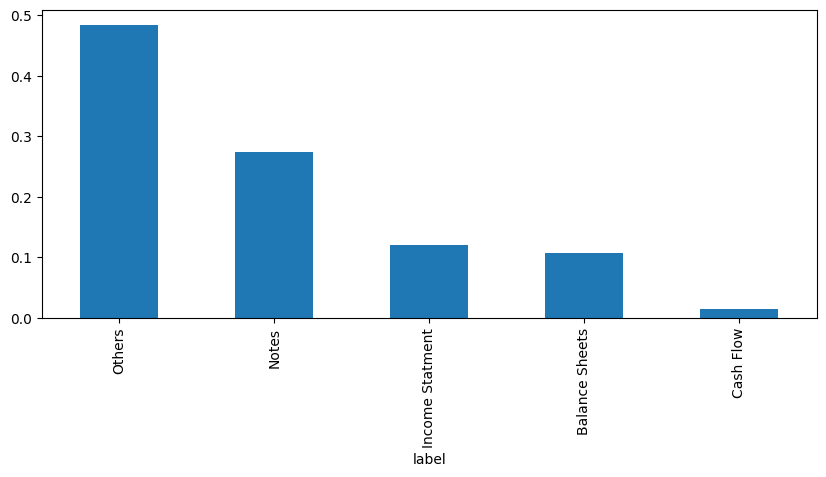

In [41]:
# check target bala
plt.figure(figsize=(10,4))
finalframe['label'].value_counts(normalize = True).plot.bar()

Here we have less Cash FLow category data and Others data category has more number of data values that is the data is imbalance.
Since we cant lose the data values we will perform oversampling.


In [42]:
# Converting the text data to numeric values representation or vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
# Generating 1000 features for the input for the model
tfidfconverter = TfidfVectorizer(max_features=1000, stop_words=stopwords.words('english'))
X = pd.DataFrame(tfidfconverter.fit_transform(finalframe['pdf_text']).toarray())
print(X[:5])
#X.columns = range(X.shape[1])
labelencoder = LabelEncoder() #Converting the labels to numeric labels
y = labelencoder.fit_transform(finalframe['label'])

   0    1    2    3    4    5    6    7    8    9    ...  990  991  992  993  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   994  995  996  997  998  999  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 1000 columns]


In [43]:
!pip install joblib

In [44]:
import joblib
# Saving the vectorizer to disk
joblib.dump(tfidfconverter, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [46]:
# Managing the imbalace data
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [47]:
import numpy as np
unique, counts = np.unique(y_resampled, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 1224]
 [   1 1224]
 [   2 1224]
 [   3 1224]
 [   4 1224]]


The data has been now balanced using random oversampling method.

In [48]:
# Train and test data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

#Building different models and comparing their performances
##Random Forest Classifier
Random Forest is an ensemble model of decision trees. Here it is used to classify the features into different categories. The reason I decided to go with RFC is beacuse of it's robustness on small datasets.

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
classifier = RandomForestClassifier(n_estimators=1200, random_state=1)  #defining 1000 nodes
rf = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Accuracy: 0.9852941176470589
                  precision    recall  f1-score   support

  Balance Sheets       1.00      1.00      1.00       258
       Cash Flow       1.00      1.00      1.00       247
Income Statement       0.98      1.00      0.99       258
           Notes       0.95      1.00      0.97       219
          Others       0.99      0.93      0.96       242

        accuracy                           0.99      1224
       macro avg       0.98      0.99      0.98      1224
    weighted avg       0.99      0.99      0.99      1224

Confusion matrix:
 [[258   0   0   0   0]
 [  0 247   0   0   0]
 [  0   0 257   0   1]
 [  0   0   0 218   1]
 [  1   0   4  11 226]]


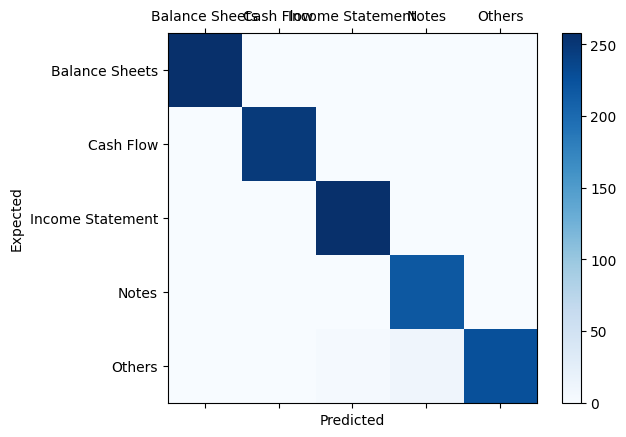

In [50]:
my_tags = ['Balance Sheets','Cash Flow','Income Statement','Notes','Others']
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('Accuracy: %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred,target_names=my_tags))
#print(confusion_matrix(y_test,y_pred))

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Balance Sheets','Cash Flow','Income Statement','Notes','Others']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [51]:
# Saving model to disk
import pickle
import requests
import json
pickle.dump(rf, open('rfmodel.pkl','wb'))

random forest gives accuracy of 98%

#Naive Bayes Classifier
NBC is based on describing counts among number of categories so it is used in text classification where the features are related to word counts or frequencies within the document to be classified.

Accuracy: 0.9125816993464052
                  precision    recall  f1-score   support

  Balance Sheets       0.96      0.99      0.97       258
       Cash Flow       0.97      0.98      0.98       247
Income Statement       0.85      1.00      0.92       258
           Notes       0.85      0.87      0.86       219
          Others       0.96      0.70      0.81       242

        accuracy                           0.91      1224
       macro avg       0.92      0.91      0.91      1224
    weighted avg       0.92      0.91      0.91      1224

Confusion matrix:
 [[256   0   0   1   1]
 [  0 243   0   4   0]
 [  0   0 258   0   0]
 [  3   3  16 191   6]
 [  9   5  31  28 169]]


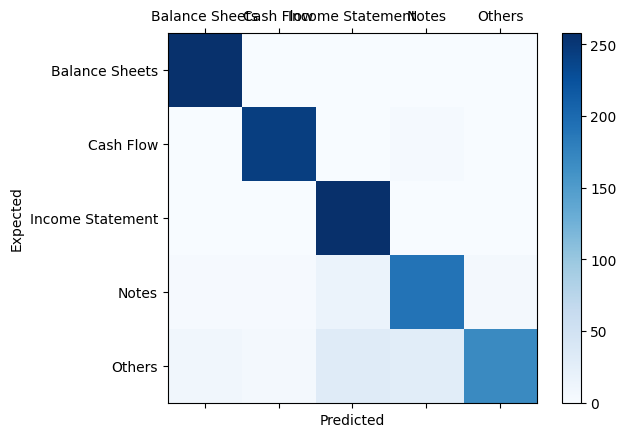

In [52]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('Accuracy: %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Balance Sheets','Cash Flow','Income Statement','Notes','Others']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [53]:
# Saving model to disk
import pickle
import requests
import json
pickle.dump(clf, open('nbmodel.pkl','wb'))

Naive bayes classifier gives accuracy of 91%

#XGBoost Classifier
Extreme Gradiant Boosting algorithm is an tree ensemble model which is optimized to predict quicker by utilizing available resources and takes care of over fitting.

Accuracy: 0.9836601307189542
                  precision    recall  f1-score   support

  Balance Sheets       1.00      1.00      1.00       258
       Cash Flow       1.00      1.00      1.00       247
Income Statement       0.97      1.00      0.98       258
           Notes       0.97      0.98      0.98       219
          Others       0.98      0.94      0.96       242

        accuracy                           0.98      1224
       macro avg       0.98      0.98      0.98      1224
    weighted avg       0.98      0.98      0.98      1224

Confusion matrix:
 [[258   0   0   0   0]
 [  0 247   0   0   0]
 [  0   0 257   0   1]
 [  0   0   0 215   4]
 [  1   0   7   7 227]]


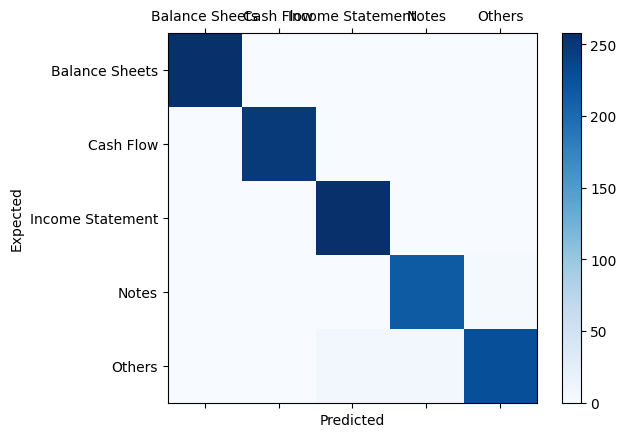

In [54]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %s" % (accuracy))
print(classification_report(y_test, y_pred,target_names=my_tags))

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Balance Sheets','Cash Flow','Income Statement','Notes','Others']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [55]:
# Saving model to disk
import pickle
import requests
import json
pickle.dump(clf, open('xgboost.pkl','wb'))

XGBoost gives accuracy of 98%

#Demo of the trained model in action

In [58]:
import pandas as pd
from bs4 import BeautifulSoup

def extract_text_from_html(html_link):
    try:
        # Open the HTML file and read its content
        with open(html_link, 'r', encoding='utf-8') as file:
            content = file.read()
        # Parse the HTML content
        soup = BeautifulSoup(content, 'lxml')
        # Extract text from the HTML
        text = soup.get_text(separator=' ', strip=True)
        return [text]
    except Exception as e:
        print(f"Error extracting text from {html_link}: {e}")
        return None

In [56]:
#Loading the saved model and a random PDF file to test classification
rfmodel = pickle.load(open('/content/rfmodel.pkl','rb'))
nb_model = pickle.load(open('/content/nbmodel.pkl','rb'))
xgb_model = pickle.load(open('/content/xgboost.pkl','rb'))


In [68]:
#Load the test or sample file
demofile='/content/drive/MyDrive/data/data/Balance Sheets/18391125_2.html'

In [69]:
textdata = extract_text_from_html(demofile)

In [70]:
dfdemo = pd.DataFrame(textdata, columns = ['Data'])

In [71]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Function to remove specific patterns
def remove_patterns(text):
    # Defining patterns to remove
    patterns_to_remove = [r'\b\d+(?:st|nd|rd|th)\b', r'\bbj\b', r'\bivj\b']

    # Replace patterns with empty string
    for pattern in patterns_to_remove:
        text = re.sub(pattern, '', text)
    return text

def remove_roman(text):
    # Define pattern for Roman numerals (case-insensitive)
    roman_pattern = r'\b(?:i{1,3}|iv|v|vi{0,3}|ix|x{1,3}|xl|l|lx{0,3}|xc|c{1,3}|cd|d|dc{0,3}|cm|m{1,3})\b'
    # Replace Roman numerals with empty string
    return re.sub(roman_pattern, '', text, flags=re.IGNORECASE)

dfdemo = pd.DataFrame(textdata, columns = ['Data'])
# Pre-processing the extracted textual data
stop = stopwords.words('english')
stemmer = WordNetLemmatizer()

for index, row in dfdemo.iterrows():
    text = row['Data']
    # Lower case conversion
    text = " ".join(text.lower() for text in text.split())
    # Getting rid of special characters
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Removing specific patterns
    text = remove_patterns(text)
    # Removing standalone numeric values
    text = re.sub(r'\b\d+\b', '', text)
    # Removing Roman numerals
    text = remove_roman(text)
    # Removing stop words
    text = " ".join(word for word in text.split() if word not in stop)
    # Removing single letters
    text = " ".join(word for word in text.split() if len(word) > 1)
    # Converting words to their dictionary form
    text = " ".join(stemmer.lemmatize(word) for word in text.split())
    # Update the 'pdf_text' column with preprocessed text
    dfdemo.at[index, 'Data'] = text


In [72]:
dfdemo.iloc[0]['Data']

'consolidated standalone particular 31mar18 31mar17 31mar18 31mar17 asset noncurrent asset property plant equipment capital workinprogress goodwill intangible asset intangible asset development financial asset investment loan financial asset deferred tax asset net income tax asset net noncurrent asset total noncurrent asset current asset inventory financial asset investment trade receivables cash cash equivalent bank balance loan financial asset current asset total current asset total asset equity liability equity equity share capital equity equity attributable shareholder company noncontrolling interest total equity noncurrent liability financial liability borrowing financial liability provision deferred tax liability net income tax liability net noncurrent liability total noncurrent liability current liability financial liability borrowing trade payable financial liability income tax liability net provision current liability total current liability total liability total equity liabil

In [73]:
# Assigning vectors to the input data
import joblib
tfidfconverter = joblib.load('tfidf_vectorizer.pkl')
inputs = pd.DataFrame(tfidfconverter.transform(dfdemo['Data']).toarray())
inputs

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.13652,0.139301,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
# Predicting the category of the input file with the help of trained model

output_category = rfmodel.predict(inputs)
#Comment the next line if you are testing word2vec model as it doesn't require transformation
output_category = (labelencoder.inverse_transform((output_category)))
output_category

array(['Balance Sheets'], dtype=object)

In [75]:
# Predicting the category of the input file with the help of trained model

output_category = nb_model.predict(inputs)
#Comment the next line if you are testing word2vec model as it doesn't require transformation
output_category = (labelencoder.inverse_transform((output_category)))
output_category

array(['Balance Sheets'], dtype=object)

In [76]:
# Predicting the category of the input file with the help of trained model

output_category = xgb_model.predict(inputs)
#Comment the next line if you are testing word2vec model as it doesn't require transformation
output_category = (labelencoder.inverse_transform((output_category)))
output_category

array(['Balance Sheets'], dtype=object)

#All of the above three models are predicting the document(html) in right category.